<a href="https://colab.research.google.com/github/fritzphilipp/github-slideshow/blob/master/Netztransparenz_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Daten_Plots/Datensatz_Netztransparenz.csv')

In [4]:
df_ausgefördert = df[df['Jahr'] >= 2021]

In [5]:
df_plot = pd.pivot_table(df_ausgefördert, values='Installierte_Leistung', index='Jahr', columns='Energieträger', aggfunc='sum')

In [7]:
df_plot = df_plot[['Solar', 'Biomasse', 'Wind an Land']]

In [8]:
def siM(x):
    return x / 1000000

In [9]:
df_plot['Solar'] = df_plot['Solar'].apply(siM)
df_plot['Wind an Land'] = df_plot['Wind an Land'].apply(siM)
df_plot['Biomasse'] = df_plot['Biomasse'].apply(siM)

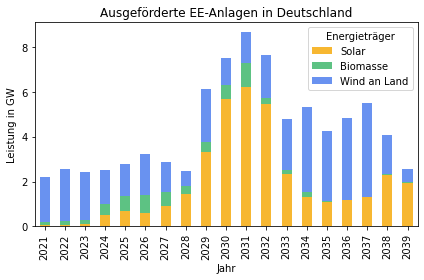

In [31]:
df_plot.plot.bar(stacked=True, color=['#f7b731','#5dc283','#6992f0'])
plt.xlabel('Jahr')
plt.ylabel('Leistung in GW')
plt.title('Ausgeförderte EE-Anlagen in Deutschland')
plt.tight_layout()
plt.savefig('Potenzial_Netztransparenz.png', dpi=300)

In [12]:
df_bestand = df[df['Jahr'] <= 2020]

In [13]:
df_plot1 = pd.pivot_table(df_bestand, values='Installierte_Leistung', index='Energieträger', aggfunc='sum')

In [14]:
def siMM(x):
    return x / 1000

In [16]:
 df_plot1['Installierte_Leistung'] = df_plot1['Installierte_Leistung'].apply(siMM)

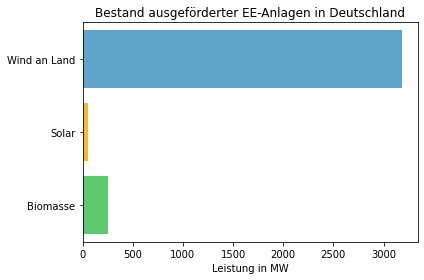

In [30]:
df_plot1.plot.barh(legend=None)
plt.barh(df_plot1.index, df_plot1['Installierte_Leistung'], align='center',color=['#5fc96f', '#f7b731', '#5fa4c9'])
plt.xlabel('Leistung in MW')
plt.ylabel(None)
plt.title('Bestand ausgeförderter EE-Anlagen in Deutschland')
plt.tight_layout()
plt.savefig('Bestand_Netztransparenz.png', dpi=300)